In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.175)

In [5]:
import matplotlib.pyplot as plt

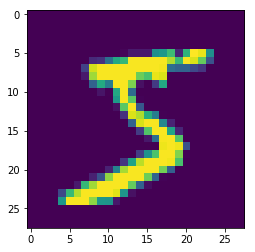

In [6]:
plt.imshow(X_train[0])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

In [8]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1))) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0727 14:49:50.816988 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 14:49:50.955788 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 14:49:50.958958 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 14:49:50.980835 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_valid /= 255
X_test /= 255


In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=120,
                   epochs=10,
                   verbose=1,
                   validation_data=(X_valid, y_valid))

W0727 14:49:51.600940 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 14:49:51.614393 140295451440960 deprecation_wrapper.py:119] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0727 14:49:51.835988 140295451440960 deprecation.py:323] From /home/ma/.bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10500 samples
Epoch 1/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.3015 - acc: 0.9089 - val_loss: 0.0869 - val_acc: 0.9747
Epoch 2/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.1241 - acc: 0.9632 - val_loss: 0.0621 - val_acc: 0.9823
Epoch 3/10
60000/60000 [==============================] - 43s 710us/step - loss: 0.0946 - acc: 0.9717 - val_loss: 0.0438 - val_acc: 0.9891
Epoch 4/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0825 - acc: 0.9761 - val_loss: 0.0387 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0732 - acc: 0.9786 - val_loss: 0.0353 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 44s 729us/step - loss: 0.0687 - acc: 0.9799 - val_loss: 0.0347 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0670 - acc: 0.9813 - val_loss: 0.

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.048955979856511116
Test accuracy:  0.9855


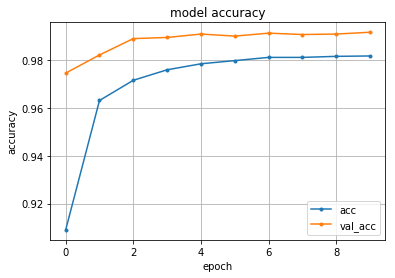

In [14]:
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')

plt.show()

In [ ]:
plt.plot(history.history['loss'], marker ='.', label='loss')
plt.plot(history.history['val_loss'], marker ='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')